# This is an examples of how to perform a mcmc Voigt profile fit to absorption lines for two instruments


## Written By: Rongmon Bordoloi
----------------

We create some fake spectrum of MgII 2796 and 2803 transitions in two different instruments (with different SNR and resolution). 

rbvfit code can take spectrum from both instruments and create a joint Voigt profile fit. 

The first example fits the same MgII absorption doublet detected in two instruments. 

The second example fits the MgII doublet with partial data from a second instrument.


-----------------
Example Created: Oct 29, 2024


In [1]:
#Load modules
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from importlib import reload

from linetools.spectra.xspectrum1d import XSpectrum1D  
from rbvfit import vfit_mcmc as mc
from rbvfit import model as m
reload(m)
reload(mc)
from pkg_resources import resource_filename


## Create some fake data to fit for the first example

Added line:MgII 2796 at z:0.348
Added line:MgII 2803 at z:0.348
Added line:MgII 2796 at z:0.348
Added line:MgII 2803 at z:0.348


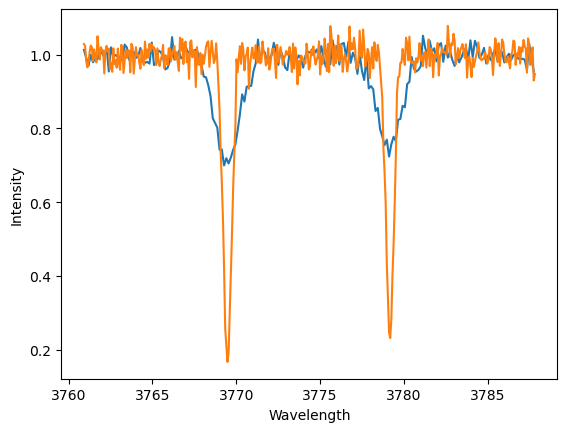

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Create the wave array from 2700 to 2820 with step size 0.5
zabs=np.array([0.348])

wave = np.arange(2790, 2810, 0.05)*(1+zabs)
wave1 = np.arange(2790, 2810, 0.1)*(1+zabs)



#Which transitions to fit
lambda_rest = [2796.3,2803.5]

#Initial guess of clouds
nguess=[13.8]
bguess=[12.]
vguess=[0.]

bounds,lb,ub=mc.set_bounds(nguess,bguess,vguess)

theta=np.concatenate((nguess,bguess,vguess))



#More book keeping
#No of clouds in the fit 
nclump= len(nguess)
#No of transitions going into the fit
ntransition=len(lambda_rest)


s=m.create_voigt(zabs,lambda_rest,nclump,ntransition=ntransition,FWHM = '6.5',verbose=True)
s1=m.create_voigt(zabs,lambda_rest,nclump,ntransition=ntransition,FWHM = '12.5',verbose=True)


y=s.model_flux(theta,wave)
y1=s1.model_flux(theta,wave1)

noise = np.random.normal(0, 0.03, wave.shape)
noise1 = np.random.normal(0, 0.02, wave1.shape)

flux=y+noise
flux1=y1+noise1

# Plot the two Gaussian profiles
plt.plot(wave1, flux1)
plt.plot(wave, flux)

plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.show()


In [40]:
# Create a dictionary to add data from second instrument

In [32]:
second_spec_dict={}
second_spec_dict['wave']=wave1
second_spec_dict['flux']=flux1
second_spec_dict['error']=noise1


In [33]:
t = mc.vfit(s.model_flux, theta, lb, ub, wave, flux, noise, no_of_Chain=50, no_of_steps=5000,
            perturbation=1e-6,skip_initial_state_check=False,second_spec=True,second_spec_dict=second_spec_dict,
            model2=s1.model_flux)
t.runmcmc()

False
Optimizing Guess ***********
Done ***********
Preparing emcee ***********
Starting emcee ***********


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:47<00:00, 104.97it/s]


Done!
*****************
Mean acceptance fraction: 0.649
Mean auto-correlation time: 33.430 steps


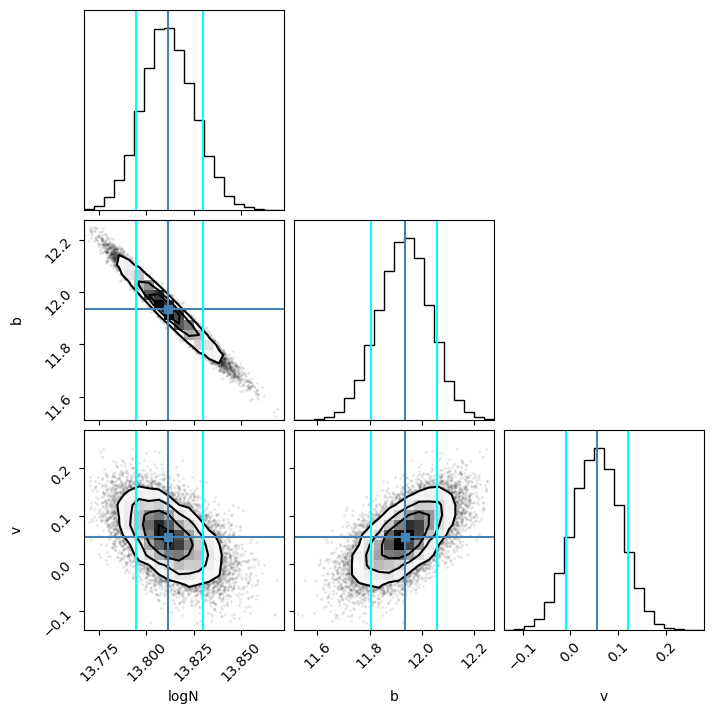

In [34]:
%matplotlib inline
t.plot_corner()

# Plot the results

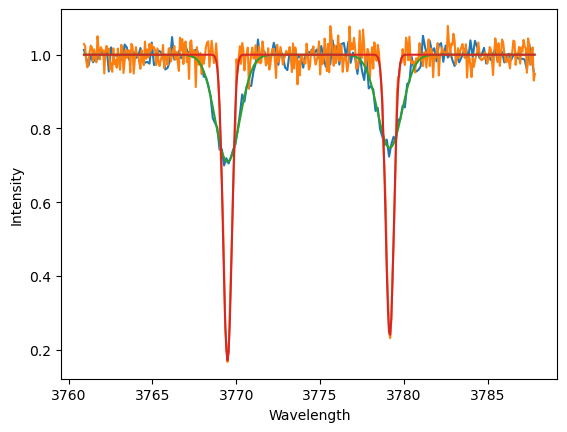

In [36]:
theta_prime=t.best_theta # Best Fit
theta_low=t.low_theta # lower bound
theta_high=t.high_theta # Upper bound

sample_full= t.samples  # Full Matrix containing the posterior distribution functions

# Plot the fitted profiles
plt.plot(wave1, flux1)
plt.plot(wave, flux)

plt.plot(wave1,s1.model_flux(theta_prime,wave1))

plt.plot(wave,s.model_flux(theta_prime,wave))


plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.show()

# Create fake data to fit the second example

Added line:MgII 2796 at z:0.348
Added line:MgII 2803 at z:0.348
Added line:MgII 2803 at z:0.348


<IPython.core.display.Javascript object>


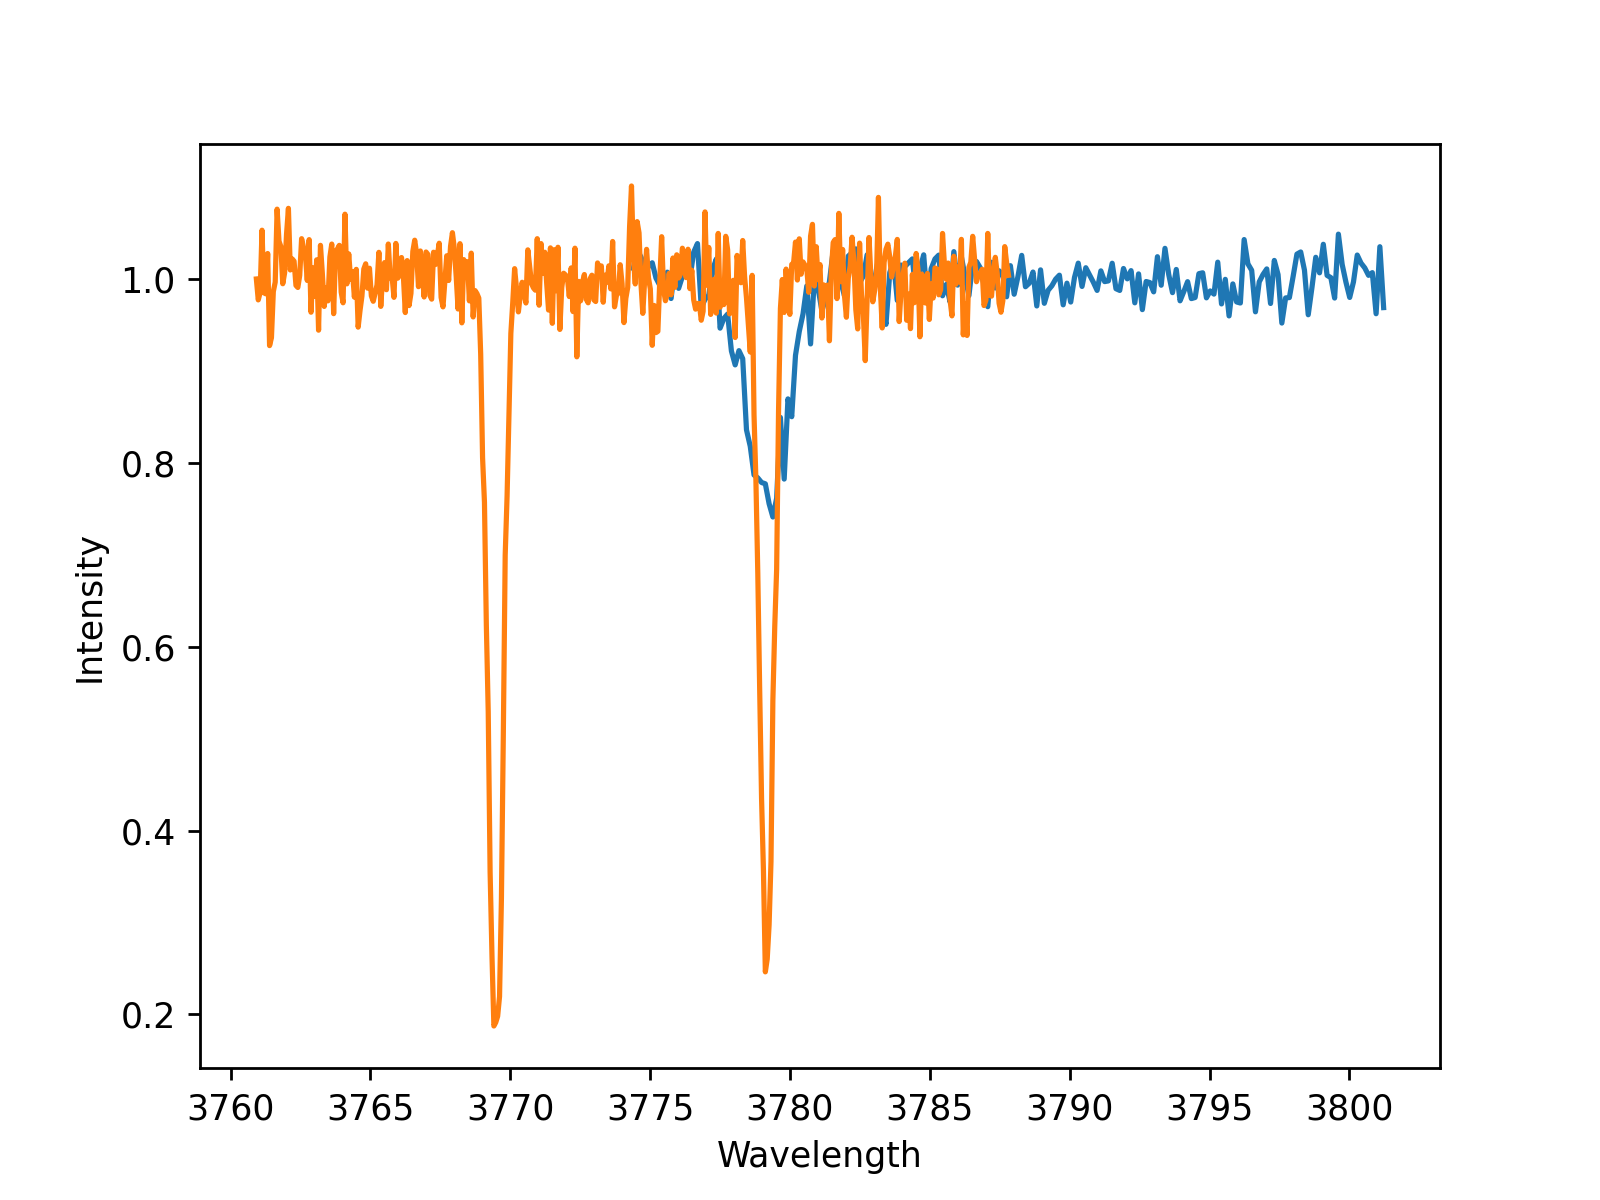

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create the wave array from 2700 to 2820 with step size 0.5
zabs=np.array([0.348])

wave = np.arange(2790, 2810, 0.05)*(1+zabs)
wave1 = np.arange(2800, 2820, 0.1)*(1+zabs)



#Which transitions to fit
lambda_rest = [2796.3,2803.5]

#Initial guess of clouds
nguess=[13.8]
bguess=[12.]
vguess=[0.]

bounds,lb,ub=mc.set_bounds(nguess,bguess,vguess)

theta=np.concatenate((nguess,bguess,vguess))



#More book keeping
#No of clouds in the fit 
nclump= len(nguess)
#No of transitions going into the fit
ntransition=len(lambda_rest)
s=m.create_voigt(zabs,lambda_rest,nclump,ntransition=ntransition,FWHM = '6.5',verbose=True)


#Which transitions to fit
lambda_rest1 = [2803.5]
ntransition1=len(lambda_rest1)

s1=m.create_voigt(zabs,lambda_rest1,nclump,ntransition=ntransition1,FWHM = '12.5',verbose=True)


y=s.model_flux(theta,wave)
y1=s1.model_flux(theta,wave1)

noise = np.random.normal(0, 0.03, wave.shape)
noise1 = np.random.normal(0, 0.02, wave1.shape)

flux=y+noise
flux1=y1+noise1

# Plot the two Gaussian profiles
plt.plot(wave1, flux1)
plt.plot(wave, flux)

plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.show()


In [3]:
second_spec_dict={}
second_spec_dict['wave']=wave1
second_spec_dict['flux']=flux1
second_spec_dict['error']=noise1


In [4]:
t = mc.vfit(s.model_flux, theta, lb, ub, wave, flux, noise, no_of_Chain=50, no_of_steps=5000,
            perturbation=1e-6,skip_initial_state_check=False,second_spec=True,second_spec_dict=second_spec_dict,
            model2=s1.model_flux)
t.runmcmc()

False
Optimizing Guess ***********
Done ***********
Preparing emcee ***********
Starting emcee ***********


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:44<00:00, 111.69it/s]


Done!
*****************
Mean acceptance fraction: 0.647
Mean auto-correlation time: 37.877 steps


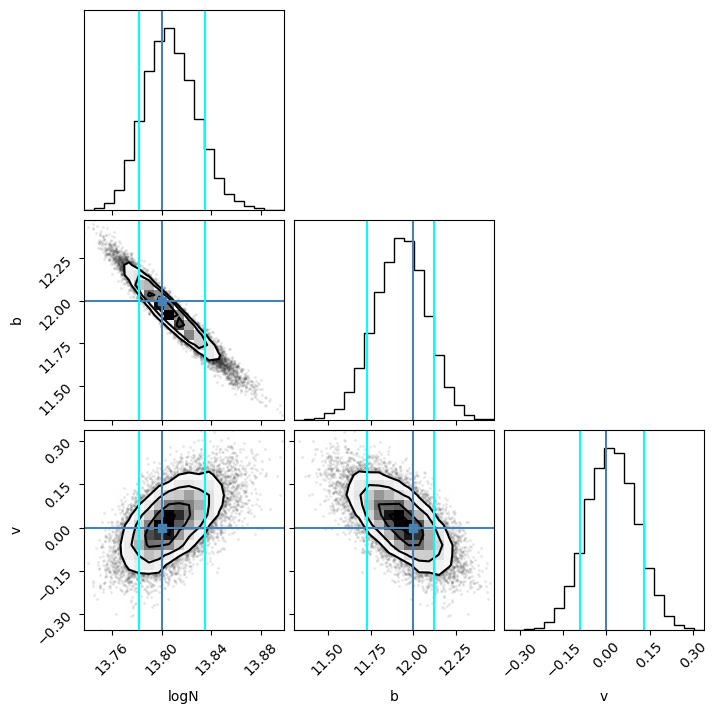

In [5]:
%matplotlib inline
t.plot_corner(True_values=theta)

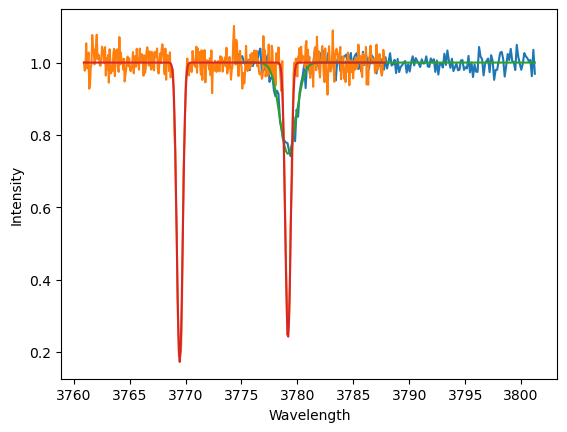

In [6]:
theta_prime=t.best_theta # Best Fit
theta_low=t.low_theta # lower bound
theta_high=t.high_theta # Upper bound

sample_full= t.samples  # Full Matrix containing the posterior distribution functions

# Plot the fitted profiles
plt.plot(wave1, flux1)
plt.plot(wave, flux)

plt.plot(wave1,s1.model_flux(theta_prime,wave1))

plt.plot(wave,s.model_flux(theta_prime,wave))


plt.xlabel("Wavelength")
plt.ylabel("Intensity")
plt.show()